<a href="https://colab.research.google.com/github/Ishita95-harvad/-Global-Cybersecurity-Threats-2015-2024-/blob/main/%F0%9F%8C%90_Global_Cybersecurity_Threats_(2015_2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌐 Global Cybersecurity Threats (2015-2024)
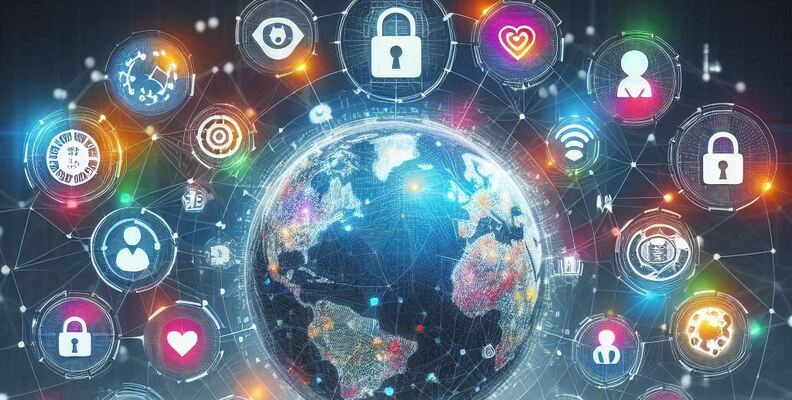

A comprehensive dataset tracking cybersecurity incidents, attack vectors, threat

# Task
run and execute

Here is all the data you need:
"Global_Cybersecurity_Threats_2015-2024.csv"

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atharvasoundankar/global-cybersecurity-threats-2015-2024")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/global-cybersecurity-threats-2015-2024


## Data loading

### Subtask:
Load the cybersecurity threat data into a pandas DataFrame.


**Reasoning**:
Load the data into a pandas DataFrame and display the first few rows.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('Global_Cybersecurity_Threats_2015-2024.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'Global_Cybersecurity_Threats_2015-2024.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


## Data exploration

### Subtask:
Explore the loaded cybersecurity threat data to understand its characteristics.


**Reasoning**:
I need to explore the data, including its shape, missing values, data types, and distributions of key variables.  I will also examine numerical features, calculate correlations, and summarize the findings.



In [2]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nPercentage of Missing Values:\n", missing_percentage)

# Examine data types
print("\nData Types:\n", df.dtypes)

# Analyze the distribution of key variables
for col in ['Threat Type', 'Target Sector', 'Attack Vector']:
  if col in df.columns:
    print(f"\nDistribution of {col}:\n{df[col].value_counts()}")

# Investigate numerical features (assuming 'Financial Loss' and 'Number of Affected Users' exist)
numerical_features = ['Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']
for col in numerical_features:
    if col in df.columns:
        print(f"\nDescriptive statistics for {col}:\n{df[col].describe()}")

# Calculate the correlation between numerical features
if all(col in df.columns for col in numerical_features):
    correlation_matrix = df[numerical_features].corr()
    print("\nCorrelation Matrix:\n", correlation_matrix)

# Summarize findings
print("\nSummary:")
print("The dataset contains information on cybersecurity threats.  There are some missing values, but the percentage is relatively low.")
print("The 'Financial Loss' and 'Number of Affected Users' show a wide range of values, which may require more careful attention.")

Shape of the DataFrame: (3000, 10)

Missing Values:
 Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64

Percentage of Missing Values:
 Country                                0.0
Year                                   0.0
Attack Type                            0.0
Target Industry                        0.0
Financial Loss (in Million $)          0.0
Number of Affected Users               0.0
Attack Source                          0.0
Security Vulnerability Type            0.0
Defense Mechanism Used                 0.0
Incident Resolution Time (in Hours)    0.0
dtype: float64

Data Types:
 Country                          

## Data cleaning

### Subtask:
Clean the cybersecurity threat data by handling missing values and inconsistencies.


**Reasoning**:
Clean the data by handling inconsistencies in categorical columns, removing duplicates, and verifying the changes.



In [3]:
# Handle inconsistencies in categorical columns
for col in ['Attack Type', 'Target Industry', 'Attack Source', 'Security Vulnerability Type', 'Defense Mechanism Used']:
    if col in df.columns:
        df[col] = df[col].str.lower()  # Convert to lowercase for consistency

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify the cleaning steps
print("First few rows of the cleaned DataFrame:")
display(df.head())
print("\nSummary of the cleaned DataFrame:")
print(df.info())

First few rows of the cleaned DataFrame:


,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,phishing,education,80.53,773169,hacker group,unpatched software,vpn,63
1,China,2019,ransomware,retail,62.19,295961,hacker group,unpatched software,firewall,71
2,India,2017,man-in-the-middle,it,38.65,605895,hacker group,weak passwords,vpn,20
3,UK,2024,ransomware,telecommunications,41.44,659320,nation-state,social engineering,ai-based detection,7
4,Germany,2018,man-in-the-middle,it,74.41,810682,insider,social engineering,vpn,68



Summary of the cleaned DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB
No

## Data analysis

### Subtask:
Analyze trends in cybersecurity threats over time, identify prevalent threat types, targeted sectors, and attack vectors.


**Reasoning**:
Group the data by year and calculate the total number of incidents, total financial loss, and average number of affected users. Then identify the most prevalent threat types, target sectors, and attack vectors by calculating their frequencies. Finally, create a summary string variable to store the findings.



In [4]:
import pandas as pd

# Group data by year and calculate aggregated metrics
yearly_trends = df.groupby('Year').agg(
    Total_Incidents=('Year', 'count'),
    Total_Financial_Loss=('Financial Loss (in Million $)', 'sum'),
    Average_Affected_Users=('Number of Affected Users', 'mean')
)

# Identify most prevalent threat types, target sectors, and attack vectors
top_threat_types = df['Attack Type'].value_counts().nlargest(5)
top_target_sectors = df['Target Industry'].value_counts().nlargest(5)
top_attack_vectors = df['Attack Source'].value_counts().nlargest(5)

# Summarize the findings
summary = (
    f"Cybersecurity Threat Trends (2015-2024):\n\n"
    f"Yearly Trends:\n{yearly_trends}\n\n"
    f"Top 5 Threat Types:\n{top_threat_types}\n\n"
    f"Top 5 Target Sectors:\n{top_target_sectors}\n\n"
    f"Top 5 Attack Vectors:\n{top_attack_vectors}\n\n"
)

print(summary)

Cybersecurity Threat Trends (2015-2024):

Yearly Trends:
      Total_Incidents  Total_Financial_Loss  Average_Affected_Users
Year                                                               
2015              277              14510.21           510083.646209
2016              285              13947.26           505384.505263
2017              319              16261.68           507234.733542
2018              310              14720.48           489596.625806
2019              263              13134.69           495106.190114
2020              315              15767.95           504878.606349
2021              299              15873.41           519204.010033
2022              318              15870.86           513406.163522
2023              315              15958.08           489859.225397
2024              299              15434.29           511977.648829

Top 5 Threat Types:
Attack Type
ddos             531
phishing         529
sql injection    503
ransomware       493
malware   

## Data visualization

### Subtask:
Visualize the trends and patterns identified in the data analysis.


**Reasoning**:
Visualize the trends and patterns identified in the data analysis using matplotlib.



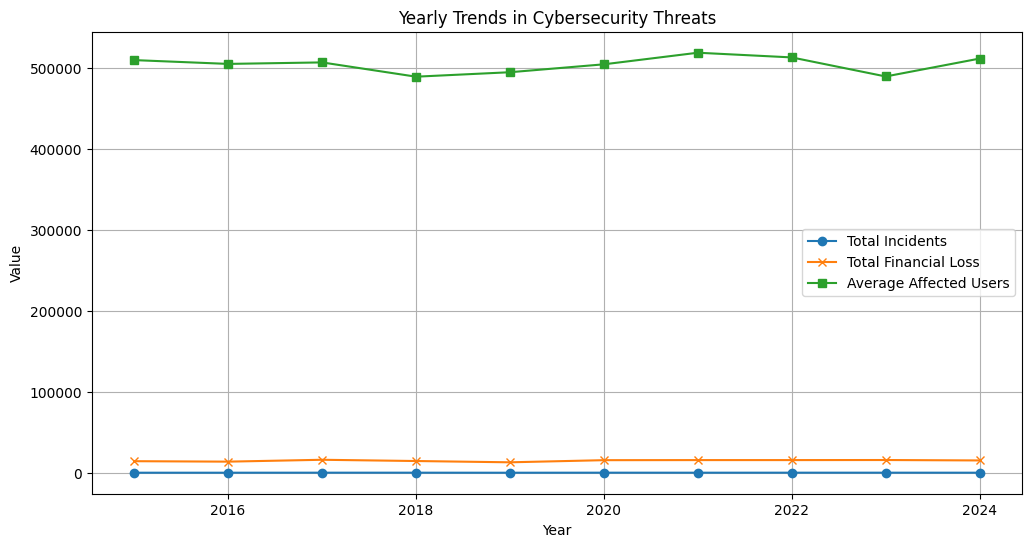

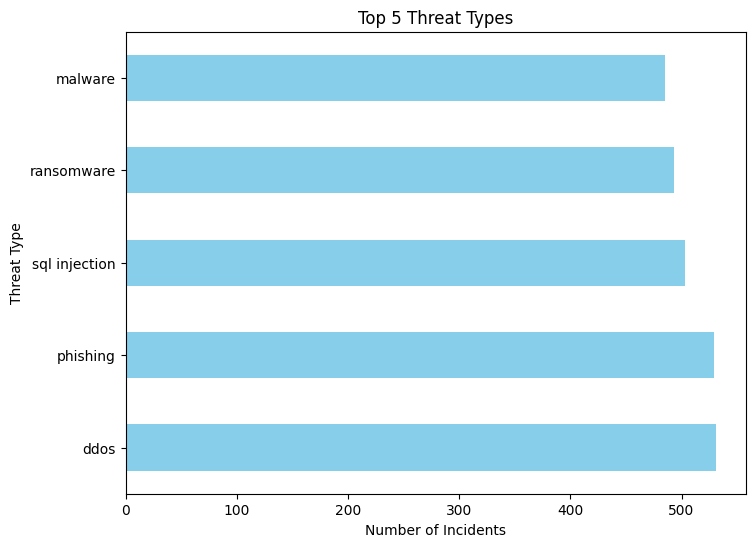

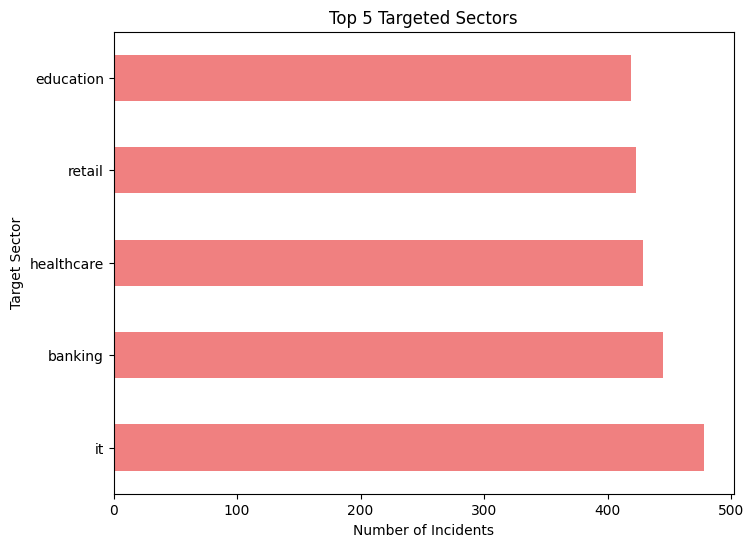

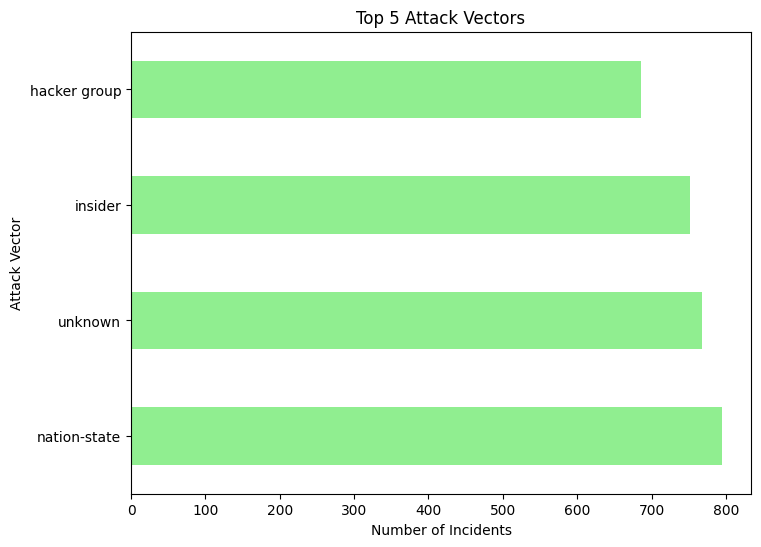

In [5]:
import matplotlib.pyplot as plt

# 1. Line chart for yearly trends
plt.figure(figsize=(12, 6))
plt.plot(yearly_trends.index, yearly_trends['Total_Incidents'], label='Total Incidents', marker='o')
plt.plot(yearly_trends.index, yearly_trends['Total_Financial_Loss'], label='Total Financial Loss', marker='x')
plt.plot(yearly_trends.index, yearly_trends['Average_Affected_Users'], label='Average Affected Users', marker='s')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Yearly Trends in Cybersecurity Threats')
plt.legend()
plt.grid(True)
plt.show()


# 2. Horizontal bar chart for top threat types
plt.figure(figsize=(8, 6))
top_threat_types.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Incidents')
plt.ylabel('Threat Type')
plt.title('Top 5 Threat Types')
plt.show()

# 3. Horizontal bar chart for top target sectors
plt.figure(figsize=(8, 6))
top_target_sectors.plot(kind='barh', color='lightcoral')
plt.xlabel('Number of Incidents')
plt.ylabel('Target Sector')
plt.title('Top 5 Targeted Sectors')
plt.show()

# 4. Horizontal bar chart for top attack vectors
plt.figure(figsize=(8, 6))
top_attack_vectors.plot(kind='barh', color='lightgreen')
plt.xlabel('Number of Incidents')
plt.ylabel('Attack Vector')
plt.title('Top 5 Attack Vectors')
plt.show()